
# Project: Investigate a Dataset of No-Show Appointments 

## (By Shireen Talaat)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### This dataset collects information from 100k medical appointments in Brazil and is focused on the question:

#### of whether or not patients show up for their appointment. 

A number of characteristics about the patient are included in each row: 

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● The last column 'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up

### Questions used on exploring the dataset: 
 
- What is the patient age  of no-shows vs shows?

- Which Gender does not show to appoinments more?

- Which neighborhoods have the highest number of no-shows?

- Which day seems to have most no-show?

- What is the patient health condition for no-shows versus shows?

- Ddoes scholarship affects the pattient attendance ?


In [10]:
# set up import statements for all of the packages that will be used.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. I will make sure to document my steps carefully.

### General Properties

In [11]:
# Loading data and printing out a few lines. followed by operations to inspect data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
sum(df['No-show'] == 'No')

88208

In [13]:
sum(df['No-show'] == 'Yes')

22319

In [14]:
no_show_percentage = 22319/110527
print(no_show_percentage * 100)

20.193255946510806


In [15]:
# check the shape of the dataframe
df.shape

(110527, 14)

In [16]:
# looing for some statistical information 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
# checing the type of columns in Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


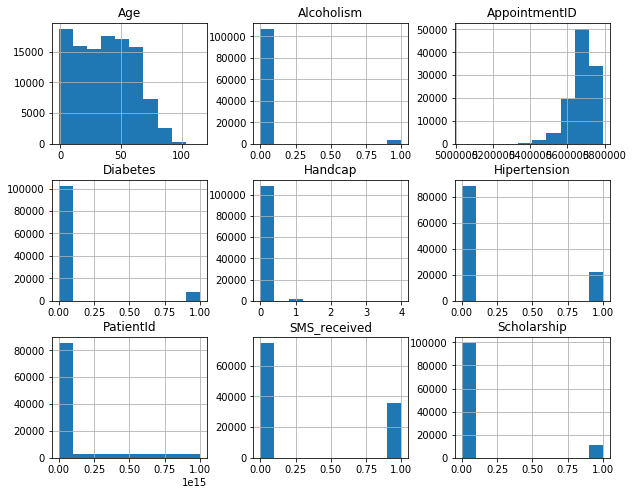

In [18]:
# checking the histogram of the data set 
df.hist(figsize = (10,8));

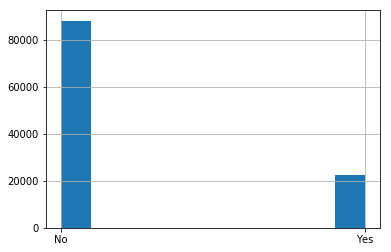

In [19]:
#check show vs no show
df['No-show'].hist();

### Data Cleaning
#### By looking at the data I've noticed: 

- Some lables need to be corrected
- There is a negative age (therefore it will be considered as a new born).
- Also I will convert te valus of no show from 'yes' and 'no' to 1 & 0 to be able to plot it. 
- creat a mask for show and no-show, for easier plotting and visualization. 
- Converting 'ScheduledDay' and	'AppointmentDay' dates to a datetime datatype.
- Creat new column named 'day_of_week' to check if no-shows occur on specific days of the week? 

In [20]:
# correcting some lable names
df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap'}, inplace = True)

In [21]:
# Change the last column from object to int to perform operation 
# fix the last column so that 0 means show, 1 means no-show
df['No-show'].replace(('Yes', 'No'), (1, 0), inplace=True)
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,0


In [22]:
#check the dataset to make sure that changes have taken place correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


In [23]:
#check new statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [24]:
# creat a mask for show and no-show, for easier plotting and visualization. 
show = df['No-show'] == 0
no_show = df['No-show'] == 1
df['show'] = show
df['no_show'] = no_show


In [25]:
#convert 'ScheduledDay' time and date into pandas timestamp
pd.to_datetime(df['ScheduledDay']).apply(lambda x: x.date())
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,show,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


In [26]:
#convert 'AppointmentDay' time and date into pandas timestamp
pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.date())
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,show,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False


In [27]:
#Creat new column named 'day_of_week' to check if no-shows occur on specific days of the week? 
df['Day_Of_Week'] = pd.to_datetime(df['AppointmentDay']).apply(lambda x: x.isoweekday())

In [28]:
#check the dataset to make sure that changes have taken place correctly
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,show,no_show,Day_Of_Week
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0,True,False,5
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0,True,False,5
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0,True,False,5
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,True,False,5
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0,True,False,5


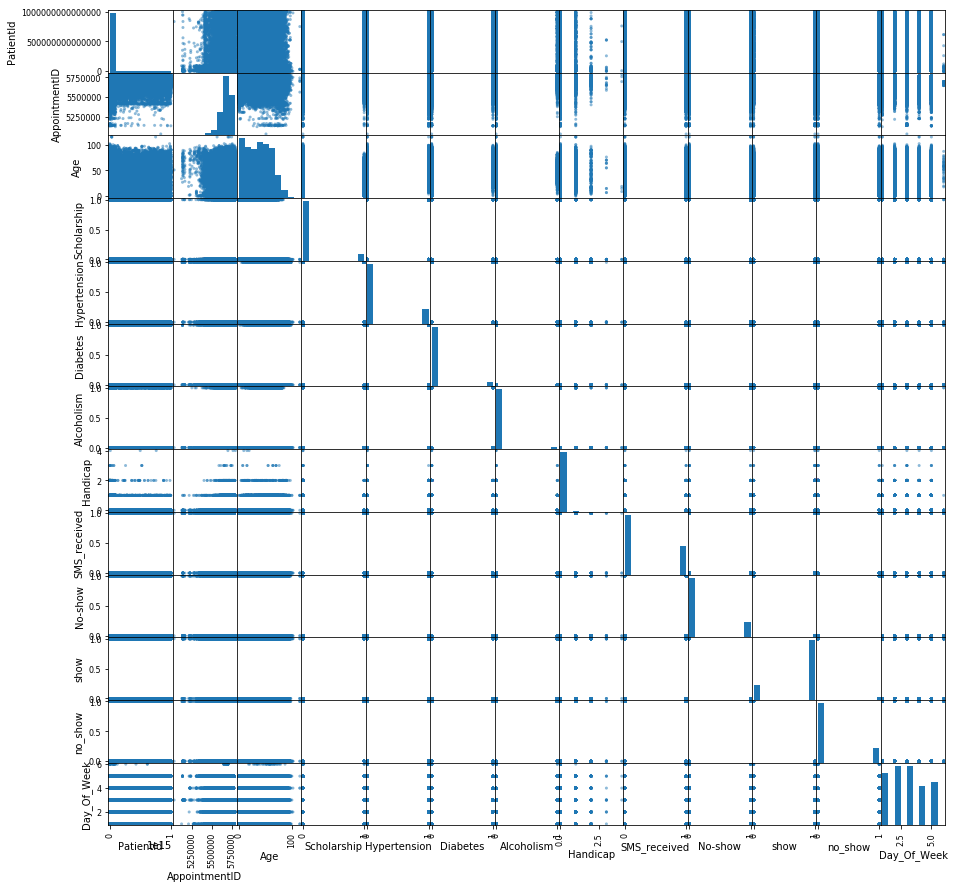

In [29]:
#plot the relationship between numirical values with scatter plot 
pd.plotting.scatter_matrix(df, figsize=(15,15));

In [30]:
#check for the total number of patient who show 
sum(df['No-show'] == 0)

88208

<a id='eda'></a>
## Exploratory Data Analysis

 Now data set is  trimmed and cleaned, let's move on to exploration, Compute statistics, and create visualizations. The goal of addressing the research questions that was posed in the Introduction section. 

### Research Question 1: What is the patient age  of no-shows vs shows?


In [31]:
#checking the mean age for patient who showed
df.Age[show].mean()

37.790064393252315

In [32]:
#checking the mean age for patient who did not show
df.Age[no_show].mean()

34.317666562121957

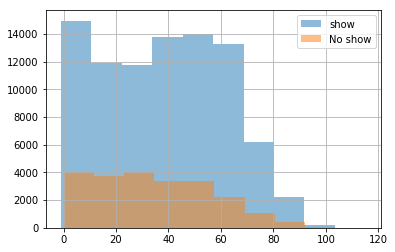

In [33]:
# plot the age mean for both show and no show together
df.Age[show].hist(alpha = 0.5, label = 'show')
df.Age[no_show].hist(alpha = 0.5, label = 'No show')
plt.legend();

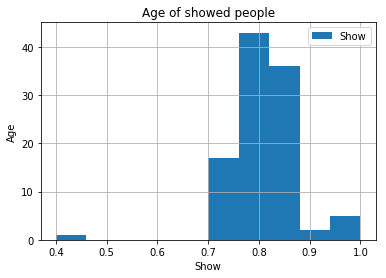

In [34]:
# plot the mean age of patient who show only
df.groupby('Age')['show'].mean().hist(label='Show');
plt.xlabel("Show")
plt.ylabel("Age")
plt.title("Age of showed people")
plt.legend();

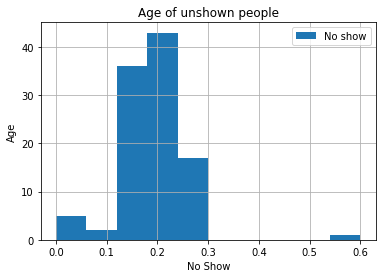

In [35]:
# plot the mean age of patient who show only
df.groupby('Age')['no_show'].mean().hist(label='No show');
plt.xlabel("No Show")
plt.ylabel("Age")
plt.title("Age of unshown people")
plt.legend();

### Research Question 2:  Which Gender does not show to appoinments more? 

In [36]:
#checking the mean gender for patient who showed
df.groupby('Gender').show.mean()

Gender
F    0.796854
M    0.800321
Name: show, dtype: float64

In [37]:
#checking the mean gender for patient who did not show
df.groupby('Gender').no_show.mean()

Gender
F    0.203146
M    0.199679
Name: no_show, dtype: float64

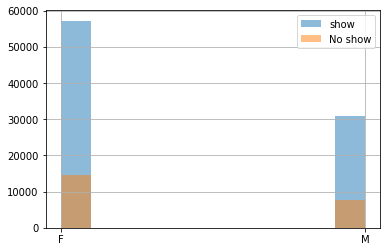

In [38]:
#checking the mean gender for patient who showed and did not show together visually 
df.Gender[show].hist(alpha = 0.5, label = 'show')
df.Gender[no_show].hist(alpha = 0.5, label = 'No show')
plt.legend();

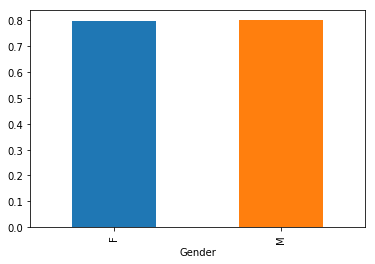

In [39]:
#checking the mean gender for patient who showed visually 
df.groupby('Gender').show.mean().plot(kind = 'bar');

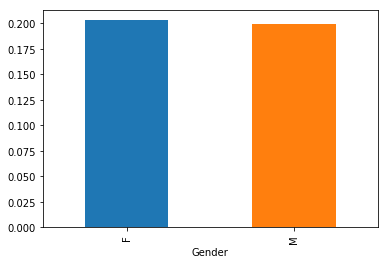

In [40]:
#checking the mean gender for patient who did not show visually 
df.groupby('Gender').no_show.mean().plot(kind = 'bar');

### Research Question 3: Which neighborhoods have the highest number of no-shows?

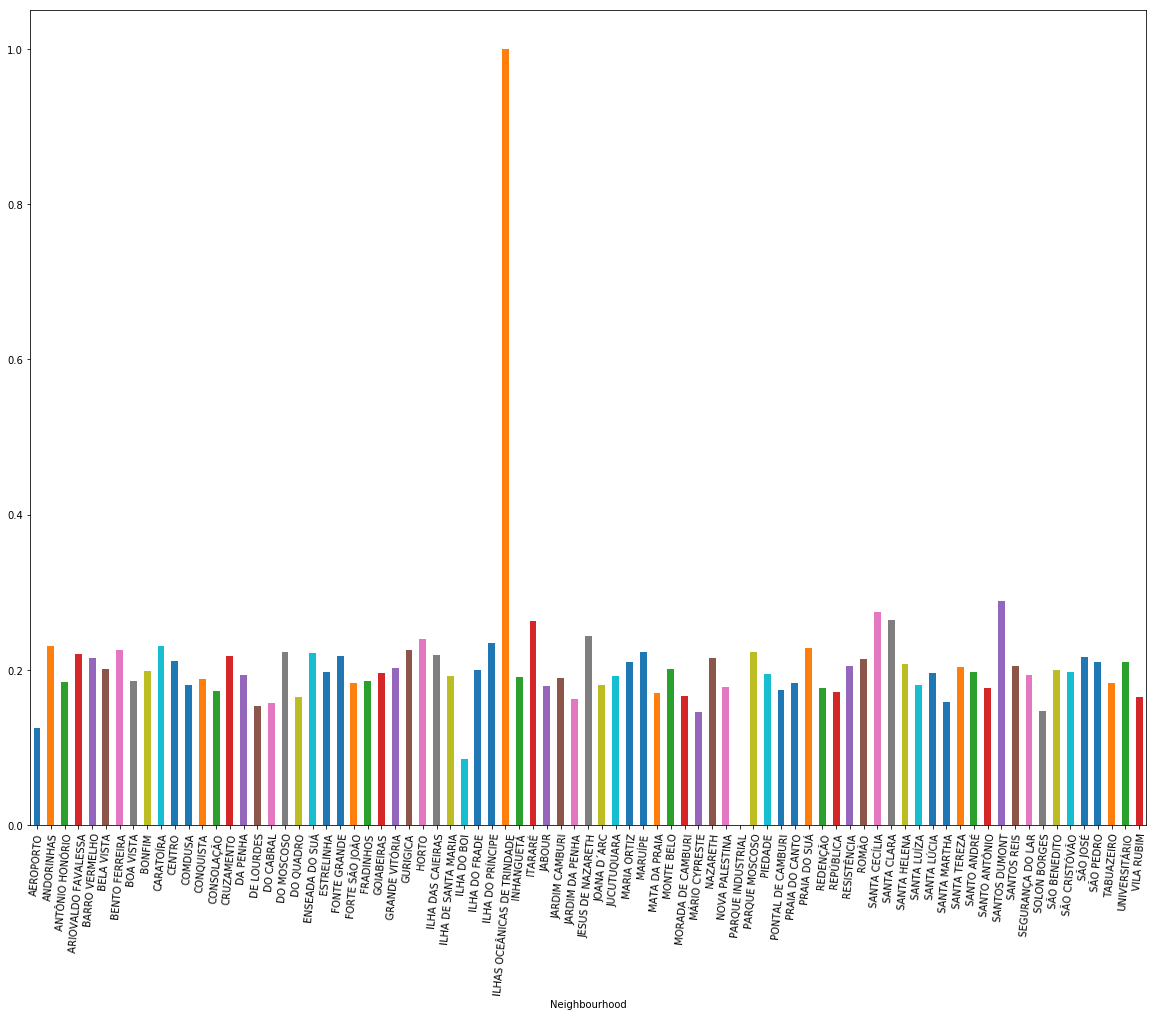

In [41]:
# check Which neighborhoods have the highest number of no-shows visually
df.groupby('Neighbourhood').no_show.mean().plot(kind = 'bar', figsize=(20,15))
plt.xticks(rotation=85);

### Research Question 4: Which day seems to have most no-show?

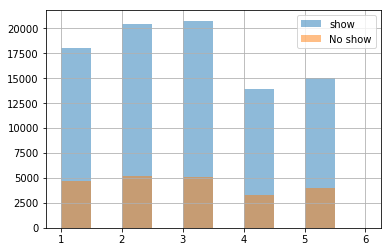

In [42]:
# check which day has the most no show
df.Day_Of_Week[show].hist(alpha = 0.5, label = 'show')
df.Day_Of_Week[no_show].hist(alpha = 0.5, label = 'No show')
plt.legend();

In [43]:
# get the mean day of week with attended patients
df.Day_Of_Week[show].mean()

2.85743923453655

In [44]:
# get the mean day of week with most no-show patients
df.Day_Of_Week[no_show].mean()

2.8614185223352302

### Research Question 5: What is the patient health condition for no-shows versus shows?

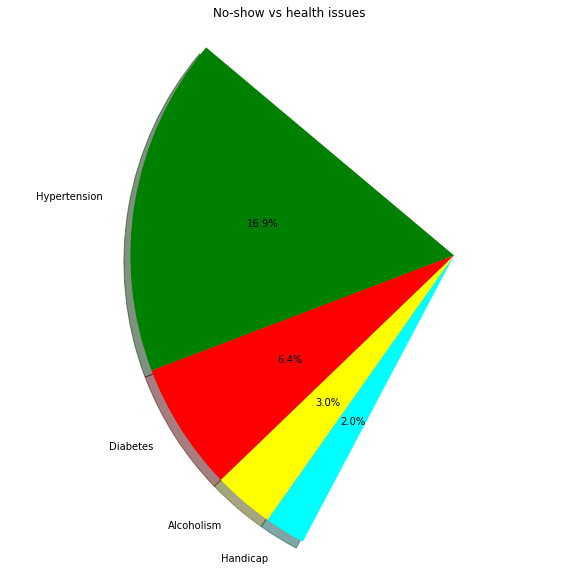

In [45]:
# check patient healt condition for no show visuall 
x = df.Hypertension[no_show].mean()
y = df.Diabetes[no_show].mean()
z = df.Alcoholism[no_show].mean()
a = df.Handicap[no_show].mean()
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
sizes = [x, y, z, a]
colors = ['green', 'red', 'yellow', 'cyan']
explode = (0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('No-show vs health issues')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10);

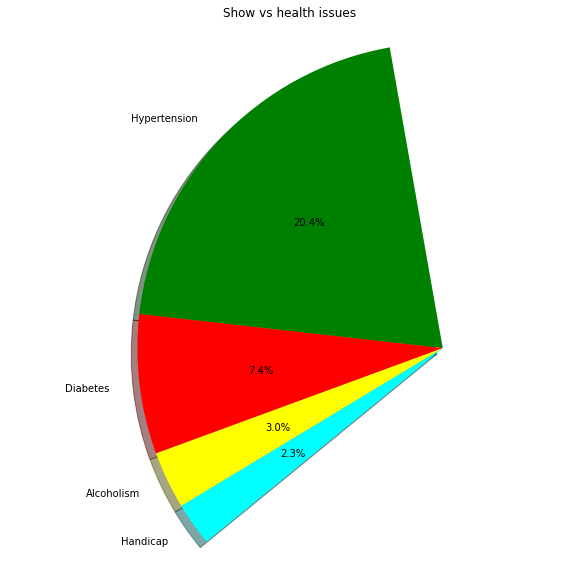

In [46]:
# check patient healt condition who showed visually 
h = df.Hypertension[show].mean()
i = df.Diabetes[show].mean()
j = df.Alcoholism[show].mean()
k = df.Handicap[show].mean()
labels = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
sizes = [h, i, j, k]
colors = ['green', 'red', 'yellow', 'cyan']
explode = (0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)

plt.title('Show vs health issues')
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10);

### Research Question 6: Does scholarship affects the pattient attendance ?

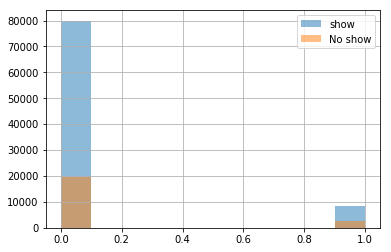

In [47]:
# check if scholarship affects the pattient attendance visually 
df.Scholarship[show].hist(alpha = 0.5, label = 'show')
df.Scholarship[no_show].hist(alpha = 0.5, label = 'No show')
plt.legend();

<a id='conclusions'></a>
## Conclusions

By analyzing this dataset we can find that the percetage of no-show patients is 20.2 % which is considered high. However, there are some limitations will be mentioned bellow. 

#### Limitations:

- The data set is over a 6 month period. Data for a longer timeframe would be much better as it would provide more insight into how seasonality affect show rates.
- There were some data such as patients with age 0 or less which does not make sense. 
- Adding some information like if the patient is covered by medical insurance or not, employed or not would beneficial.

#### Findings and results: 

- Average age of attended patients is 37.7 years, and the average age for unattended patients is 34 years.
- It seems that female patients do not show to their appointment more than male patients, however the difference is minor.
- The neighborhood that has the highest number of no-shows is ILHAS OCEÃ‚NICAS DE TRINDADE
- Appointment no-shows occurred the most on third day which is Wednesday and the least on 4th da which is Thursdays. 
- Patients with health issues were invistgated using charts to check if there was a large difference between the no-shows and shows. Hypertension was the largest category in both segments. 
- By checking if scholarship affects the pattient attendance it turns out that  most of patients who has Scholarship are most likely to miss thier appointments.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])